<a href="https://colab.research.google.com/github/mskang222/NLP_2023/blob/main/11%EC%9B%94_2%EC%9D%BC(knn%EA%B8%B0%EB%B2%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 그래프 출력을 위해 선언합니다.
%matplotlib inline
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")
df.head(3)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6


In [4]:
#sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있다.
from sklearn.model_selection import train_test_split

#다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다.
train_6, test_6= train_test_split(df,test_size=0.2,random_state=99)  #traning:test=8:2

print(train_6.shape,test_6.shape)

(80, 8) (20, 8)


In [5]:
train_3 = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test_3 = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [6]:
x_train_3=train_3[['3P','TRB','BLK']] #학습할때 사용할 문제
y_train_3=train_3[['Pos']]    #학습할때 사용할 답

최적의 k 찾기 (교차 검증 - cross validation

In [7]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier #KNN분류기 불러오기
from sklearn.model_selection import cross_val_score #학습할때 교차검증 방법을 사용, 모의고사

# find best k, range from 3 to half of the number of data
max_k_range = train_6.shape[0] // 2  # -> 80/2
k_list = []   # k_list를 빈공간으로 만든다.
for i in range(3, max_k_range, 2):    #3부터 2씩증가 (홀수만)
    k_list.append(i)        # 최적의 k의 후보군 (KNN사용시 하이퍼 파라미터)

cross_validation_scores = []
x_train = train_6[['3P', 'BLK' , 'TRB']]
y_train = train_6[['Pos']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.95,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.925,
 0.9125,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8125,
 0.8]

In [8]:
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

지도학습에서는 문제X와 답Y를 정확하게 구분해야 한다.

In [9]:
# 3개 짜리
x_train=train_6[['3P','BLK','TRB']] #학습할때 사용할 문제(x)
y_train=train_6[['Pos']]    #학습할때 사용할 답(y)

In [10]:
y_train.values   #답안지를 사용할 때는 데이터 프레임안에 있는 내용만 불러온다,

array([['SG'],
       ['SG'],
       ['SG'],
       ['C'],
       ['C'],
       ['C'],
       ['C'],
       ['C'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['C'],
       ['C'],
       ['SG'],
       ['C'],
       ['C'],
       ['C'],
       ['SG'],
       ['C'],
       ['C'],
       ['C'],
       ['C'],
       ['C'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['C'],
       ['C'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['C'],
       ['C'],
       ['C'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['SG'],
       ['SG'],
       ['

In [11]:
y_train.values.shape   #2차원으로 보임

(80, 1)

In [12]:
cross_validation_scores=[]   #cross_validation_scores를 리스트로 담아둔다.
#10-fold cross validation
for k in k_list: #3,5,7,9,...
   knn=KNeighborsClassifier(n_neighbors=k)  #KNN 방법의 핵심 파라미터는 k, 파라미터를 변화해가면서 돌린다.
   scores=cross_val_score(knn,x_train,y_train.values.ravel(),
                          cv=10,scoring='accuracy')  #cv:몇번 나눠서 시험을 볼건지
   print(scores)      # k=3일때,10번의 점수
                      # k=5일때, 10번의 점수

[0.875 1.    1.    0.875 0.875 1.    1.    1.    1.    0.875]
[0.875 0.875 1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.875 1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  1.    1.    0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  1.    0.875 0.75  1.    1.    0.875 1.    1.   ]
[0.875 0.75  0.875 0.875 0.75  0.875 1.    0.875 1.    1.   ]
[0.875 0.75  0.875 0.875 0.75  0.875 1.    0.875 1.    1.   ]
[0.875 0.75  0.875 0.875 0.75  0.875 1.    0.875 1.    1.   ]
[0.875 0.75  0.875 0.875 0.75  0.875 1.    0.875 1.    0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    1.    1.    0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    1.    0.875 0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    0.875 0.875 0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    0.875 0.875 0.875]
[0.875 0.625 0.875 0.875 0.75  0.75  1.    0.875 0.875 0.875]
[0.875 0

평균값 구하는 것은: .mean

In [13]:
cross_validation_scores=[]
#10-fold cross validation
for k in k_list: #3,5,7,9,...
   knn=KNeighborsClassifier(n_neighbors=k)  #KNN 방법의 핵심 파라미터는 k, 파라미터를 변화해가면서 돌린다.
   scores=cross_val_score(knn,x_train,y_train.values.ravel(),cv=10,scoring='accuracy')  #cv:몇번 나눠서 시험을 볼건지
   print(scores.mean())   #평균값: score 뒤에 .maean()를 붙인다
                          # k가 3일때 평균값
                          # k가 5일때 평균값

0.95
0.925
0.925
0.9125
0.9125
0.925
0.9125
0.8875
0.8875
0.8875
0.875
0.8625
0.85
0.8375
0.8375
0.8375
0.8375
0.8125
0.8


In [14]:
cross_validation_scores=[]
#10-fold cross validation
for k in k_list: #3,5,7,9,...
   knn=KNeighborsClassifier(n_neighbors=k)  #KNN 방법의 핵심 파라미터는 k, 파라미터를 변화해가면서 돌린다.
   scores=cross_val_score(knn,x_train,y_train.values.ravel(),cv=10,scoring='accuracy')  #cv:몇번 나눠서 시험을 볼건지
   cross_validation_scores.append(scores.mean()) #평균값: score 뒤에 .maean()를 붙인다
                                                 #append: scores.mean()의 값을 cross_validation_scores=[]의 빈 리스트에 담는다.

적절한 k를 찾는것

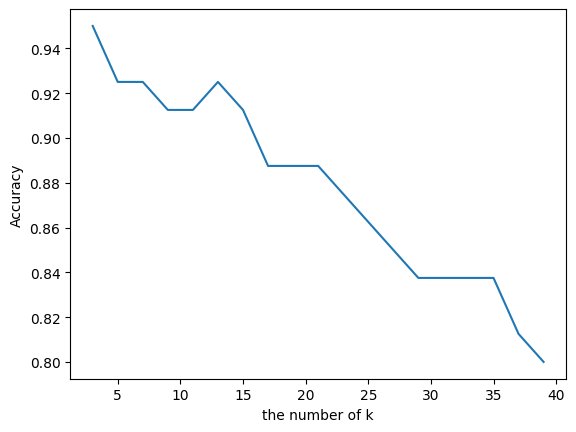

In [15]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()